# Calibrating the global orientation of the TART

Author: Tim Molteno tim@elec.ac.nz

We use google maps to do this and find an arm that aligns closely to a distant landmark.

In [ ]:
!pip install numpy pyproj tart-tools
import numpy as np


In [3]:
import pyproj
import numpy as np

geodesic = pyproj.Geod(ellps='WGS84')

def bearing(lat1,  lon1,  lat2, lon2):
    fwd_azimuth,back_azimuth,distance = geodesic.inv(lon1, lat1, lon2, lat2)
    return fwd_azimuth

def bearing_latlon(a, b):
    return bearing(lon1=a[1], lat1=a[0], lon2=b[1], lat2=b[0])

def get_rotation_angle(expected_angle, actual_angle):
    print(f"expected angle {expected_angle}")
    print(f"actual angle {actual_angle}")
    rotation =  -(actual_angle - expected_angle)
    return rotation

def get_geographic_angle(dx, dy):
    ''' Diven an x (east is +x) and y (north is +y) delta, 
        return the angle from north.
        
        positive angles point clockwise from geographic north.

    '''
    brng = np.arctan2(dx,dy) # count degrees counter-clockwise
    brng = np.degrees(brng)
    brng = (brng + 360) % 360;
    return brng; 

In [4]:
get_geographic_angle(1, 0)

np.float64(90.0)

In [11]:
import json
from tart.operation import settings

def create_calibrated_positions(original_positions, fname, _rot):
    " Rotate the positions and write to file."    
    print(f"Rotating positions by {_rot} degrees")
    _rot_rad = np.radians(_rot)
                
    new_positions = settings.rotate_location(
                    np.degrees(_rot_rad), np.array(original_positions).T)
                
    _pos_list = (np.array(new_positions).T).tolist()

    with open(fname, 'w') as f:
        json.dump(_pos_list, f, indent=4)
    print(f"Written file '{fname}' with calibrated positions")


# Rhodes Site

Measurement was taken along arm 5 that pointed to a distant wind turbine.

In [5]:
# Rhodes Site
tree = [-33.314532, 26.504503];
monument = [-33.319285, 26.519030]
turbine = [-33.326303, 26.469101] 
rhodes_tart = [-33.319449, 26.507807]; 

ang_tart_turbine = bearing_latlon(rhodes_tart, turbine)

# positive angles point west of geographic north. (clockwise)
ang_tart_turbine

-101.92133948345194

In [ ]:
expected_angle =  -72  # Arm 5
actual_angle = ang_tart_turbine
get_rotation_angle(expected_angle, ang_tart_turbine)

expected angle -72
actual angle -101.92133948345194


29.921339483451945

In [ ]:
# Import unaligned positions from json

with open('rhodes/rhodes_antenna_positions_nonaligned.json') as f:
    nonaligned_json = json.load(f)
    ant_pos_unaligned = nonaligned_json['ant_pos']

for i, p in enumerate(ant_pos_unaligned):
    print(i,p)

0 [-0.354, 0.603, 0.0]
1 [-1.295, 2.204, 0.0]
2 [-0.567, 0.966, 0.0]
3 [-1.037, 1.765, 0.0]
4 [-0.877, 1.493, 0.0]
5 [1.211, 1.357, 0.0]
6 [1.715, 1.922, 0.0]
7 [0.177, 0.199, 0.0]
8 [0.377, 0.423, 0.0]
9 [0.629, 0.705, 0.0]
10 [2.344, -1.038, 0.0]
11 [0.622, -0.276, 0.0]
12 [1.397, -0.619, 0.0]
13 [1.105, -0.489, 0.0]
14 [1.777, -0.787, 0.0]
15 [-0.093, -0.867, 0.0]
16 [-0.275, -2.561, 0.0]
17 [-0.037, -0.345, 0.0]
18 [-0.246, -2.287, 0.0]
19 [-0.136, -1.264, 0.0]
20 [-2.475, -0.522, 0.0]
21 [-2.187, -0.461, 0.0]
22 [-1.775, -0.374, 0.0]
23 [-1.258, -0.265, 0.0]


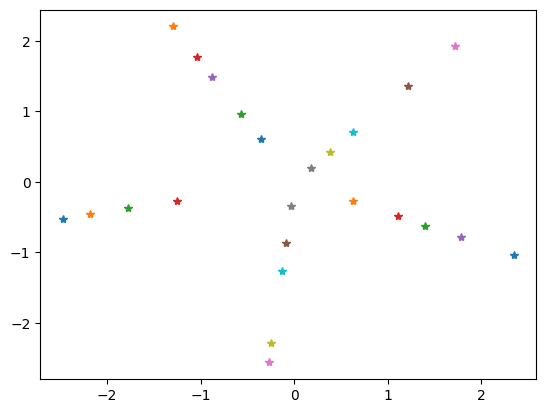

In [ ]:
import matplotlib.pyplot as plt

for i, p in enumerate(ant_pos_unaligned):
    plt.plot(p[0], p[1], '*')
plt.show()

In [ ]:
ant20 = ant_pos_unaligned[20]
x,y,z = ant20

expected_angle = get_geographic_angle(x,y)
expected_angle

np.float64(258.09034295837546)

In [ ]:
rot = get_rotation_angle(expected_angle, ang_tart_turbine)
rot

expected angle 258.09034295837546
actual angle -101.92133948345194


np.float64(360.0116824418274)

Now enter this information into the global_rotation field in the site survey notebook

## UdM site in Mauritius

The bearing was taken along the path to antenna 4 which featured a power pole in the distance

In [6]:
# UdM site
udm_tart = [-20.2587508, 57.75919894]
udm_pole = [-20.257990, 57.760779]

ang_tart_pole = bearing_latlon(udm_tart, udm_pole)

ang_tart_pole

62.96852731799942

In [7]:
# This is with antenna 4
ant4 = [1.6261960453222395, 0.7033414756277336, 0.0]
x,y,z = ant4

expected_angle = get_geographic_angle(x,y)
expected_angle

np.float64(66.6111707190563)

In [ ]:
get_rotation_angle(expected_angle, ang_tart_pole)

expected angle 66.6111707190563
actual angle 62.96852731799942


np.float64(3.642643401056887)

In [13]:
# Import unaligned positions from json

with open('mu-udm/mu-udm_antenna_positions_unaligned.json') as f:
    nonaligned_json = json.load(f)
    ant_pos_unaligned = nonaligned_json['antenna_positions']

for i, p in enumerate(ant_pos_unaligned):
    print(i,p)

ant4 = ant_pos_unaligned[4]
x,y,z = ant4

expected_angle = get_geographic_angle(x,y)
expected_angle

0 [0.016001715087056268, 0.3505786259474876, 0.0]
1 [0.2836828631811004, 0.8751708931261915, 0.0]
2 [0.7531123865358798, 1.0531361957990955, 0.0]
3 [1.1935415591787124, 0.9800664958060115, 0.0]
4 [1.6261960453222395, 0.7033414756277336, 0.0]
5 [0.27361889515756155, 0.07988716337850496, 0.0]
6 [0.831588373446414, 0.047628719718821134, 0.0]
7 [1.2464835755649837, -0.42388035757849174, 0.0]
8 [1.282573653682392, -0.9872567767679263, 0.0]
9 [1.1655898456033458, -1.341467716967819, 0.0]
10 [0.13335783373505028, -0.19156293548076925, 0.0]
11 [0.29084950139548693, -0.8489900439405029, 0.0]
12 [0.0729932152849017, -1.2378248793300035, 0.0]
13 [-0.363957682473202, -1.4873252318605878, 0.0]
14 [-0.9706461996769297, -1.514422056308884, 0.0]
15 [-0.25421640981981813, -0.30945216180556767, 0.0]
16 [-0.7650015872823619, -0.542427795708414, 0.0]
17 [-1.2475582385029393, -0.39662393100016036, 0.0]
18 [-1.565888282214949, -0.05228878875130531, 0.0]
19 [-1.7324190878839387, 0.40548121855921654, 0.0]
20 

np.float64(66.6111707190563)

In [16]:
rot = get_rotation_angle(expected_angle, ang_tart_pole)
create_calibrated_positions(ant_pos_unaligned, 
                            fname = 'mu-udm/calibrated_antenna_positions.json',
                            _rot=rot)

expected angle 66.6111707190563
actual angle 62.96852731799942
Rotating positions by 3.642643401056887 degrees
Written file 'mu-udm/calibrated_antenna_positions.json' with calibrated positions


## Nairobi site in Kenya

The bearing was taken along the path to antenna 4 which featured a distant highrise building

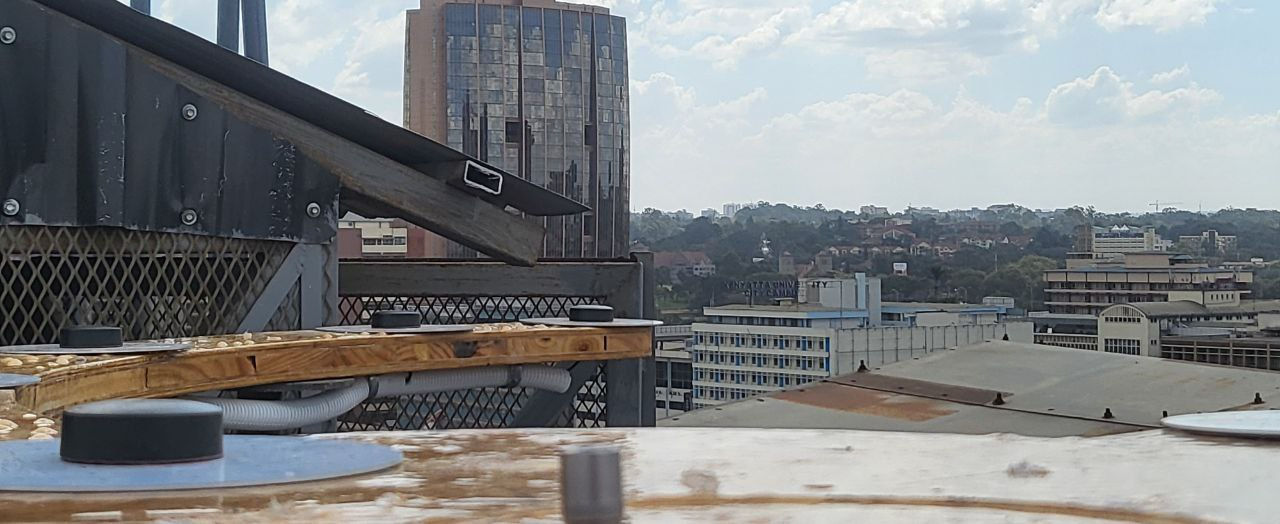

In [ ]:
from IPython.display import display, Image
display(Image(filename='kenya/kenya_align.jpg'))

In [ ]:
kenya_tart = [-1.2921912, 36.8255432]
kenya_bldg = [-1.2910364936808718, 36.82057428007954]

ang_tart_bldg = bearing_latlon(kenya_tart, kenya_bldg)

ang_tart_bldg


-76.99889424794894

In [ ]:
# Import unaligned positions from json

with open('kenya/kenya_antenna_positions_nonaligned.json') as f:
    nonaligned_json = json.load(f)
    ant_pos_unaligned = nonaligned_json['ant_pos']

In [ ]:
for i, p in enumerate(ant_pos_unaligned):
    print(i,p)

0 [0.009239416809377544, 0.3368137547706912, 0.0]
1 [0.13786645601497646, 0.8192445253901629, 0.0]
2 [0.4104798094168402, 1.1291258002419677, 0.0]
3 [0.7260872979415582, 1.2725048452908396, 0.0]
4 [1.07327681912436, 1.303615987516888, 0.0]
5 [0.3231840530647149, 0.09529396660005413, 0.0]
6 [0.8217509221743188, 0.12204168952263597, 0.0]
7 [1.2007076869946967, -0.041470436491498286, 0.0]
8 [1.4345973395947367, -0.29732443348712667, 0.0]
9 [1.5714732564525917, -0.6179074183351599, 0.0]
10 [0.19049931260656597, -0.27791884448906046, 0.0]
11 [0.3700035441753223, -0.743818613220712, 0.0]
12 [0.3315983516991526, -1.1547559395220077, 0.0]
13 [0.16054261809816456, -1.4562614508716913, 0.0]
14 [-0.10205293422517839, -1.6855037739487169, 0.0]
15 [-0.20544900304036584, -0.2670572586083899, 0.0]
16 [-0.5930761559160463, -0.5817468739578479, 0.0]
17 [-0.9957686350311789, -0.6722079828439206, 0.0]
18 [-1.3353765449671768, -0.6026946396578139, 0.0]
19 [-1.6345454384554092, -0.42379120213136745, 0.0]
2

In [ ]:
# Use antenna #5 (index=4)

ant5 = ant_pos_unaligned[4]
x,y,z = ant5

expected_angle = get_geographic_angle(x,y)
expected_angle

np.float64(39.464882676530635)

In [ ]:
rot = get_rotation_angle(expected_angle, ang_tart_bldg)
rot

expected angle 39.464882676530635
actual angle -76.99889424794894


np.float64(116.46377692447957)

In [ ]:
create_calibrated_positions(ant_pos_unaligned, fname = 'kenya/calibrated_antenna_positions.json')

Rotating positions by 116.46377692447957 degrees
Written file 'kenya/calibrated_antenna_positions.json' with calibrated positions


In [ ]:
!'{command}'

/bin/bash: line 1: {command}: command not found


In [ ]:
!tart_upload_antenna_positions --api=https://api.elec.ac.nz/tart/tart-kenya --file kenya/antenna_positions_kenya.json --pw sharkbait

Traceback (most recent call last):
  File "/home/tim/tart-telescope/position_cal/.venv/bin/tart_upload_antenna_positions", line 32, in <module>
    with open(ARGS.file, "r") as f:
         ~~~~^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'kenya/antenna_positions_kenya.json'
